In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [11]:
N_f = np.array([1349, 1221, 1087, 1071, 1063, 1049, 1264, 1142], dtype = 'float')
def avg(a) :
    sum = 0
    for i in range(a.size) :
        sum += a[i]
    return sum / (a.size)
n_f = avg(N_f)

In [77]:
#Fe
N1 = np.array([1187612, 545345, 269572, 143482, 77654, 43068], dtype = 'float')
l1 = np.array([10.4, 20.8, 31., 40.9, 51., 61.1], dtype = 'float')
#Al
N2 = np.array([1365301, 775367, 464536, 285907, 181181, 117943], dtype = 'float')
l2 = np.array([20.1, 40., 60.1, 80.1, 99.9, 119.6], dtype = 'float')
#Pb
N3 = np.array([1135805, 550541, 283905, 143549, 78219, 42519], dtype = 'float')
l3 = np.array([5.5, 10.4, 15.3, 20.1, 25.1, 30.0], dtype = 'float')
N1 -= n_f
N2 -= n_f
N3 -= n_f
N0 = 2078091. - n_f

Text(0.1, 3.7, '$\\mu_{Pb} = 1.308 \\pm 0.012 см^{-1}$')

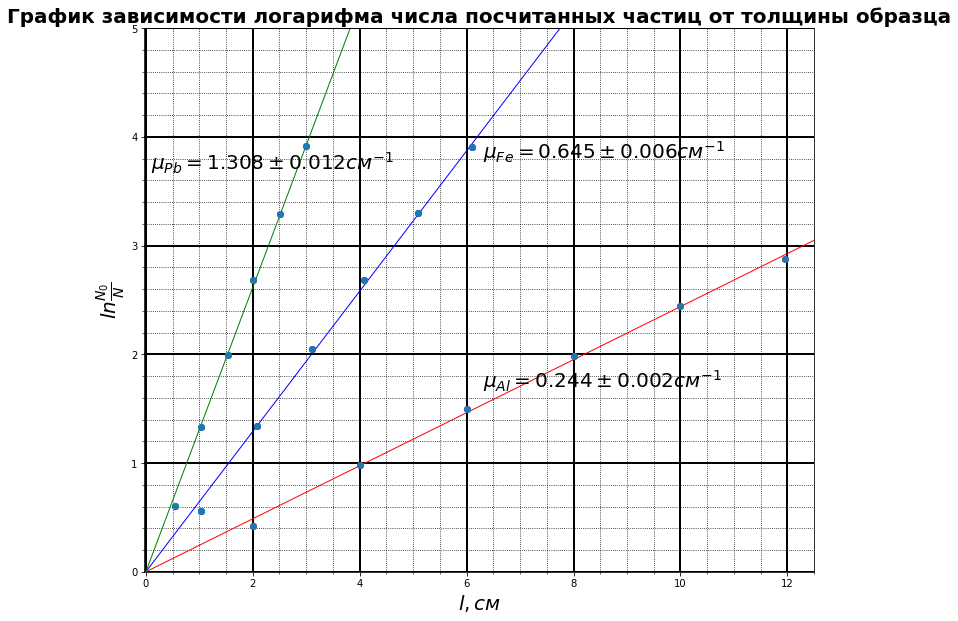

In [102]:
y1 = N0/N1
y2 = N0/N2
y3 = N0/N3
plt.plot(l1/10, np.log(y1), "bo")
plt.plot(l2/10, np.log(y2), "ro")
plt.plot(l3/10, np.log(y3), "go")
ye1 = (1/N0 + 1/N1) ** .5 * N1/N0
plt.errorbar(l1/10, np.log(y1), yerr = ye1,xerr = 0.05/10, fmt='o', ecolor='navy')
ye2 = (1/N0 + 1/N2) ** .5 * N2/N0
plt.errorbar(l2/10, np.log(y2), yerr = ye2,xerr = 0.05/10, fmt='o', ecolor='navy')
ye3 = (1/N0 + 1/N3) ** .5 * N3/N0
plt.errorbar(l3/10, np.log(y3), yerr = ye3,xerr = 0.05/10, fmt='o', ecolor='navy')
plt.title("График зависимости логарифма числа посчитанных частиц от толщины образца", fontsize = 20, fontweight = 'bold')
fig = plt.gcf()
fig.set_size_inches(12, 10)
ax = plt.gca()
ax.set_ylabel(r'$ln\frac{N_0}{N}$', fontsize = 20)
ax.set_xlabel(r'$l, см$', fontsize = 20)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
ax.set_ylim(0, 5)
ax.set_xlim(None, 12.5)

m1 = sm.OLS(np.log(y1), l1/10)
res1 = m1.fit()
param1 = res1.params[::-1]
error1 = res1.bse[::-1]
inter = np.linspace(0, 20, 100)
plt.plot(inter, param1*inter, "b", linewidth = '1')
plt.text(6.3, 3.8, r'$\mu_{Fe} = %.3f \pm %.3f см^{-1}$' % (param1, error1), fontsize = 20)

m2 = sm.OLS(np.log(y2), l2/10)
res2 = m2.fit()
param2 = res2.params[::-1]
error2 = res2.bse[::-1]
plt.plot(inter, param2*inter, "r", linewidth = '1')
plt.text(6.3, 1.7, r'$\mu_{Al} = %.3f \pm %.3f см^{-1}$' % (param2, error2), fontsize = 20)

m3 = sm.OLS(np.log(y3), l3/10)
res3 = m3.fit()
param3 = res3.params[::-1]
error3 = res3.bse[::-1]
plt.plot(inter, param3*inter, "g", linewidth = '1')
plt.text(0.1, 3.7, r'$\mu_{Pb} = %.3f \pm %.3f см^{-1}$' % (param3, error3), fontsize = 20)